In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from itertools import product
import sys,os
import time

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath("/home/olya/SFU/Breast_cancer/DESMOND/"))

from find_optimal_parameters import parse_biclust,read_true_bics,read_all_results
from find_optimal_parameters import  plot_F1_heatmap,get_opt_params, F1_per_bic

%matplotlib inline

In [2]:
# and prefix of input file name
fname_prefix = "simulated.N=10.Mu=2.0.GxP="
# suffix idication overlap type
overlap = "TT"
# where are output files
out_dir = "../simulated_datasets/results/"

# sizes of biclusters
g_sizes = [5,10,20,50,100]
s_sizes = [10,20,50,100]

# true biclusters 
true_bic_dir = "../simulated_datasets/true_biclusters/"
true_bic_fname_prefix = fname_prefix
true_bic_fname_suffix = ".overlap="+overlap+".biclusters.txt"

In [3]:
# predicted biclusters 
tool_name = "ISA"
tool_suffix = "ISA"
n_runs = 10

#parameters = (("no_seeds",[0.05,0.1,0.15,0.2,0.25,0.3, 0.35, 0.4,0.45 ,0.5]))
parameters = [ ("no_seeds", range(10,110,10))]

pred_bic_dir =  out_dir+tool_name+"/"
pred_bic_fname_prefix = fname_prefix
pred_bic_fname_suffix = ".overlap="+overlap+"."+tool_suffix+".biclust_results.txt"

img_outdir = out_dir + "/F1/img"
tsv_outdir = out_dir + "/F1/"

In [5]:
results= read_all_results(parameters,tool_name,n_runs=n_runs,
                          pred_bic_dir=pred_bic_dir,
                          pred_bic_fname_prefix=fname_prefix,
                          pred_bic_fname_suffix=pred_bic_fname_suffix,
                          true_bic_dir=true_bic_dir,
                          true_bic_fname_prefix=fname_prefix,
                          true_bic_fname_suffix=true_bic_fname_suffix)

results_outfile =  tsv_outdir+ tool_suffix+".results.tsv"
results.to_csv(results_outfile ,sep="\t")

Parameter combiations not found: 0
Successfull parameter combinations: 10
	files not found: 0
	files empty: 0
	failed to parse: 0
Total runs 2000
Non-zero runs: 2000


In [6]:
parameters

[('no_seeds', [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])]

Total combinations: 10
Total combinations: 10
Combinations with mean F1 > 0.1 10


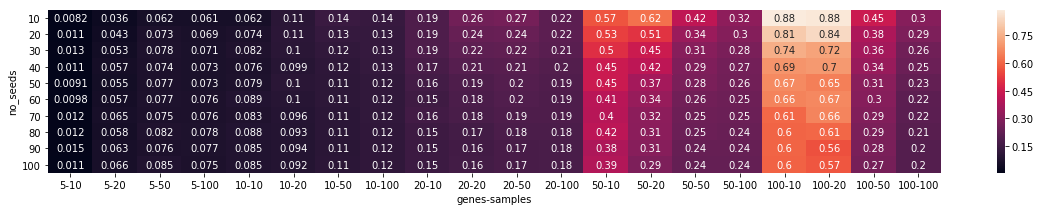

In [7]:
params = ["no_seeds"]
plot_file = img_outdir+"/" + tool_name+".F1_heatmap.svg"
heatmap_outfile =  tsv_outdir+ tool_name+".F1_heatmap.tsv"

heatmap = plot_F1_heatmap(results,params,f1_thr=0.1,
                          g_sizes = [5,10,20,50,100], s_sizes = [10,20,50,100],
                          plot=True,plot_file=plot_file,outfile=heatmap_outfile)

In [8]:
params

['no_seeds']

In [9]:
default_params = ([100])

In [10]:
r = get_opt_params(results, params, default_params=default_params, more_n_smaples = 0)
r

All 2000 runs considered

Optimal parameters (max. avg. F1 per bicluster):
	no_seeds=10;
	Max. avg. F1 per bicluster:0.3±0.261
	avg. F1 per best match:0.456±0.298
	biclusters per run:35.3±17.6
With default parameters:
	no_seeds=100;
	avg. F1 per bicluster:0.205±0.156
	avg. F1 per best match:0.597±0.336
	biclusters per run:203.7±137.4


F1 per bicluster                                      \
                     mean       std count       max       min   
no_seeds                                                        
10               0.299999  0.260751   200  0.991790  0.003866   
20               0.276913  0.233244   200  0.941383  0.003010   
30               0.256227  0.205504   200  0.822754  0.004336   
40               0.241291  0.192196   200  0.826182  0.005392   
50               0.230042  0.180903   200  0.726496  0.003248   
60               0.223468  0.177453   200  0.760231  0.004069   
70               0.217478  0.169312   200  0.773217  0.005127   
80               0.212004  0.162483   200  0.695050  0.005278   
90               0.205394  0.154679   200  0.663920  0.008022   
100              0.205099  0.155624   200  0.685477  0.006913   

         F1 per best match                                     n_biclusters  \
                      mean       std count       max       min         mean   
no_seeds                                                                      
10                0.456346  0.297647   200  0.980388  0.002415       35.285   
20                0.557081  0.340083   200  0.992929  0.002984       58.850   
30                0.585661  0.339516   200  0.988955  0.003178       79.800   
40                0.596348  0.341982   200  0.992416  0.003300       98.840   
50                0.596364  0.341409   200  0.991406  0.004208      119.315   
60                0.599313  0.338161   200  0.991406  0.004110      134.930   
70                0.596864  0.338539   200  0.991406  0.003456      150.945   
80                0.597602  0.334931   200  0.991406  0.006300      169.045   
90                0.593743  0.336102   200  0.991406  0.007020      189.095   
100               0.596766  0.335515   200  0.991406  0.008293      203.680   

                                    F1 per bicluster  
                 std count  max min           n_runs  
no_seeds                                              
10         17.559197   200   81   6             10.0  
20         32.640843   200  131   8             10.0  
30         46.217532   200  164   7             10.0  
40         60.155196   200  224   5             10.0  
50         73.464898   200  267  14             10.0  
60         87.886148   200  309  13             10.0  
70         98.031643   200  330  12             10.0  
80        112.104416   200  384  15             10.0  
90        127.506847   200  452  12             10.0  
100       137.445385   200  464  16             10.0